#Importing the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
from collections import Counter as counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss

#Importing the datasets

**Train Data**

In [6]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'12tkdT4sKUBVIWzF6WzrLyoTXjKt9K-Hf'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data_train.csv')

In [4]:
trainData=pd.read_csv('data_train.csv',index_col=None, delimiter=";")
trainData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1257897600,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,1231286400,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,1288656000,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,1236124800,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,1248307200,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,1235433600,MANHEIM,2006,3,KIA,OPTIMA V6 2.7L V6 MP,LX,4D SEDAN LX,RED,...,7572.0,8763.0,NaN,NaN,18111,30331,GA,5830.0,0,728
65616,0,1273708800,MANHEIM,2005,5,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,GREEN,...,8950.0,9952.0,NaN,NaN,18881,30272,GA,5195.0,0,1389
65617,0,1292371200,OTHER,2007,3,FORD,FOCUS,ZX4,4D SEDAN S,GOLD,...,8888.0,10299.0,NaN,NaN,22808,73108,OK,5180.0,0,1243
65618,0,1254182400,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,RED,...,10401.0,12057.0,NaN,NaN,99740,50111,IA,7295.0,0,1272


In [7]:
trainData.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

**Feature Data**

In [8]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1y0bnIdWi1DTbxbm5OTev6_QW3AXBFK4E'}) # replace the id with id of file you want to access
downloaded.GetContentFile('features_aim.csv')

In [9]:
featureAim =  pd.read_csv('features_aim.csv',delimiter = ';')
featureAim

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1269993600,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,BLACK,AUTO,...,11337.0,12402.0,NaN,NaN,22808,75236,TX,8040.0,0,1020
1,1231804800,MANHEIM,2003,6,FORD,TAURUS 3.0L V6 EFI S,SE,4D WAGON LX,BROWN,AUTO,...,2830.0,4196.0,NaN,NaN,3453,80022,CO,3640.0,0,1220
2,1261526400,ADESA,2008,1,DODGE,CALIBER,SE,4D WAGON,RED,AUTO,...,10564.0,11431.0,NaN,NaN,20234,85226,AZ,6765.0,0,693
3,1280793600,MANHEIM,2005,5,HYUNDAI,ACCENT,GLS,2D HATCHBACK,BLACK,AUTO,...,6611.0,7185.0,NaN,NaN,835,85040,AZ,5340.0,0,693
4,1236124800,MANHEIM,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L LS,BEIGE,AUTO,...,8727.0,10279.0,NaN,NaN,20207,75236,TX,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,1263859200,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,SILVER,AUTO,...,11208.0,12670.0,NaN,NaN,17675,28625,NC,6730.0,0,1243
7288,1286236800,MANHEIM,2007,3,TOYOTA,CAMRY V6,LE,4D SEDAN LE,GREY,AUTO,...,13768.0,15233.0,NaN,NaN,22916,80022,CO,10550.0,0,620
7289,1289260800,MANHEIM,2006,4,HYUNDAI,ELANTRA,GLS,4D SEDAN,WHITE,AUTO,...,7845.0,8784.0,NaN,NaN,20928,34761,FL,5735.0,0,533
7290,1237939200,MANHEIM,2003,6,CHRYSLER,PT CRUISER 2.4L I4 M,Bas,4D SEDAN,MAROON,AUTO,...,4196.0,5159.0,NaN,NaN,3453,80011,CO,4675.0,0,1515


**Test Results**

In [10]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'14CkHu7oRV5eAYxpxF4uSwhK-u0nRXKEk'}) # replace the id with id of file you want to access
downloaded.GetContentFile('features_aim.csv')

In [11]:
featureTest =  pd.read_csv('features_aim.csv',delimiter = ';')
featureTest

,IsBadBuy
0,0
1,0
2,0
3,0
4,0
...,...
6557,1
6558,0
6559,0
6560,1


**Test dataset**

In [12]:
testData = pd.concat([featureTest,featureAim], axis = 1) 
testData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0.0,1269993600,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,BLACK,...,11337.0,12402.0,NaN,NaN,22808,75236,TX,8040.0,0,1020
1,0.0,1231804800,MANHEIM,2003,6,FORD,TAURUS 3.0L V6 EFI S,SE,4D WAGON LX,BROWN,...,2830.0,4196.0,NaN,NaN,3453,80022,CO,3640.0,0,1220
2,0.0,1261526400,ADESA,2008,1,DODGE,CALIBER,SE,4D WAGON,RED,...,10564.0,11431.0,NaN,NaN,20234,85226,AZ,6765.0,0,693
3,0.0,1280793600,MANHEIM,2005,5,HYUNDAI,ACCENT,GLS,2D HATCHBACK,BLACK,...,6611.0,7185.0,NaN,NaN,835,85040,AZ,5340.0,0,693
4,0.0,1236124800,MANHEIM,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L LS,BEIGE,...,8727.0,10279.0,NaN,NaN,20207,75236,TX,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,NaN,1263859200,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,SILVER,...,11208.0,12670.0,NaN,NaN,17675,28625,NC,6730.0,0,1243
7288,NaN,1286236800,MANHEIM,2007,3,TOYOTA,CAMRY V6,LE,4D SEDAN LE,GREY,...,13768.0,15233.0,NaN,NaN,22916,80022,CO,10550.0,0,620
7289,NaN,1289260800,MANHEIM,2006,4,HYUNDAI,ELANTRA,GLS,4D SEDAN,WHITE,...,7845.0,8784.0,NaN,NaN,20928,34761,FL,5735.0,0,533
7290,NaN,1237939200,MANHEIM,2003,6,CHRYSLER,PT CRUISER 2.4L I4 M,Bas,4D SEDAN,MAROON,...,4196.0,5159.0,NaN,NaN,3453,80011,CO,4675.0,0,1515


**Test dataset with all correct formats**

In [13]:
testData = testData.iloc[0:6562,:]
testData = testData.astype({'IsBadBuy':'int'})
testData.loc[:, 'PurchDate'] = pd.to_datetime(testData.loc[:, 'PurchDate'], unit='s')
testData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2010-03-31,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,BLACK,...,11337.0,12402.0,NaN,NaN,22808,75236,TX,8040.0,0,1020
1,0,2009-01-13,MANHEIM,2003,6,FORD,TAURUS 3.0L V6 EFI S,SE,4D WAGON LX,BROWN,...,2830.0,4196.0,NaN,NaN,3453,80022,CO,3640.0,0,1220
2,0,2009-12-23,ADESA,2008,1,DODGE,CALIBER,SE,4D WAGON,RED,...,10564.0,11431.0,NaN,NaN,20234,85226,AZ,6765.0,0,693
3,0,2010-08-03,MANHEIM,2005,5,HYUNDAI,ACCENT,GLS,2D HATCHBACK,BLACK,...,6611.0,7185.0,NaN,NaN,835,85040,AZ,5340.0,0,693
4,0,2009-03-04,MANHEIM,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L LS,BEIGE,...,8727.0,10279.0,NaN,NaN,20207,75236,TX,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,1,2010-05-27,MANHEIM,2003,7,CHEVROLET,1500HD SILVERADO PIC,LS,CREW CAB 6.0L LS,WHITE,...,10907.0,14684.0,NaN,NaN,25100,77061,TX,10810.0,0,1641
6558,0,2010-01-15,MANHEIM,2005,5,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,SILVER,...,7146.0,8702.0,NaN,NaN,22916,89165,NV,3685.0,0,1503
6559,0,2009-12-09,ADESA,2005,4,PONTIAC,G6 V6,Bas,4D SEDAN,GREY,...,9760.0,11105.0,NaN,NaN,21053,85226,AZ,6565.0,0,1003
6560,1,2010-11-15,OTHER,2008,2,JEEP,COMPASS FWD 4C,Spo,4D SUV SPORT 2.0L,BLACK,...,12124.0,13160.0,NaN,NaN,99761,90045,CA,8100.0,0,825


In [14]:
testData.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [15]:
testData.columns.get_loc("MMRAcquisitionAuctionAveragePrice") 

17

#Exploratory data analysis

In [16]:
#Converting PurchDate column into date into years using the UNIT parameter
trainData.loc[:, 'PurchDate'] = pd.to_datetime(trainData.loc[:, 'PurchDate'], unit='s')
trainData.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2009-11-11,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,2009-01-07,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,2010-11-02,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,2009-03-04,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,2009-07-23,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623


In [17]:
#Converting PurchDate column into date into years using the YEARFIRST parameter
trainData.loc[:, 'PurchDate'] = pd.to_datetime(trainData.loc[:, 'PurchDate'], yearfirst= True)
trainData.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2009-11-11,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,2009-01-07,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,2010-11-02,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,2009-03-04,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,2009-07-23,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623


In [18]:
#Describing the data
des = trainData.describe().T
des

,count,mean,std,min,25%,50%,75%,max
IsBadBuy,65620.0,0.123499,0.329012,0.0,0.00,0.0,0.00,1.0
VehYear,65620.0,2005.345215,1.730096,2001.0,2004.00,2005.0,2007.00,2010.0
VehicleAge,65620.0,4.175130,1.709897,0.0,3.00,4.0,5.00,9.0
WheelTypeID,62747.0,1.494589,0.520986,0.0,1.00,1.0,2.00,3.0
VehOdo,65620.0,71505.930280,14582.977355,5368.0,61844.75,73378.5,82440.00,115717.0
MMRAcquisitionAuctionAveragePrice,65602.0,6127.143807,2456.965693,0.0,4273.00,6094.0,7765.00,35722.0
MMRAcquisitionAuctionCleanPrice,65602.0,7371.157236,2716.442814,0.0,5405.00,7303.0,9018.75,36859.0
MMRAcquisitionRetailAveragePrice,65602.0,8498.240770,3153.983067,0.0,6279.00,8447.0,10658.00,39080.0
MMRAcquisitonRetailCleanPrice,65602.0,9851.611003,3382.364048,0.0,7494.00,9792.0,12094.00,41482.0
MMRCurrentAuctionAveragePrice,65330.0,6131.694092,2430.506847,0.0,4275.00,6062.0,7735.00,35722.0


In [19]:
#Checking infos of each columns
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

In [20]:
#check for nulls
print(f'is NaN {trainData.isna().sum()}')

is NaN IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionCleanPrice            290
MMRC

In [21]:
#check for size
print(f'index_size: {trainData.index.size}')

index_size: 65620


In [22]:
#check for duplicates
print(f'duplicate entries: {trainData.duplicated().sum()}')

duplicate entries: 0


,count,mean,std,min,25%,50%,75%,max
IsBadBuy,65620.0,0.123499,0.329012,0.0,0.00,0.0,0.00,1.0
VehYear,65620.0,2005.345215,1.730096,2001.0,2004.00,2005.0,2007.00,2010.0
VehicleAge,65620.0,4.175130,1.709897,0.0,3.00,4.0,5.00,9.0
WheelTypeID,62747.0,1.494589,0.520986,0.0,1.00,1.0,2.00,3.0
VehOdo,65620.0,71505.930280,14582.977355,5368.0,61844.75,73378.5,82440.00,115717.0
MMRAcquisitionAuctionAveragePrice,65602.0,6127.143807,2456.965693,0.0,4273.00,6094.0,7765.00,35722.0
MMRAcquisitionAuctionCleanPrice,65602.0,7371.157236,2716.442814,0.0,5405.00,7303.0,9018.75,36859.0
MMRAcquisitionRetailAveragePrice,65602.0,8498.240770,3153.983067,0.0,6279.00,8447.0,10658.00,39080.0
MMRAcquisitonRetailCleanPrice,65602.0,9851.611003,3382.364048,0.0,7494.00,9792.0,12094.00,41482.0
MMRCurrentAuctionAveragePrice,65330.0,6131.694092,2430.506847,0.0,4275.00,6062.0,7735.00,35722.0


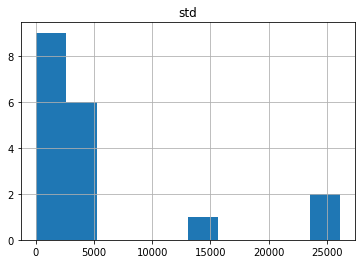

In [23]:
#Checking for outliers
des = trainData.describe().T
des.hist(column='std')
des

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'IsBadBuy'),
  Text(2, 0, 'VehYear'),
  Text(3, 0, 'VehicleAge'),
  Text(4, 0, 'WheelTypeID'),
  Text(5, 0, 'VehOdo'),
  Text(6, 0, 'MMRAcquisitionAuctionAveragePrice'),
  Text(7, 0, 'MMRAcquisitionAuctionCleanPrice'),
  Text(8, 0, 'MMRAcquisitionRetailAveragePrice'),
  Text(9, 0, 'MMRAcquisitonRetailCleanPrice'),
  Text(10, 0, 'MMRCurrentAuctionAveragePrice'),
  Text(11, 0, 'MMRCurrentAuctionCleanPrice'),
  Text(12, 0, 'MMRCurrentRetailAveragePrice'),
  Text(13, 0, 'MMRCurrentRetailCleanPrice'),
  Text(14, 0, 'BYRNO'),
  Text(15, 0, 'VNZIP1'),
  Text(16, 0, 'VehBCost'),
  Text(17, 0, 'IsOnlineSale'),
  Text(18, 0, 'WarrantyCost')])

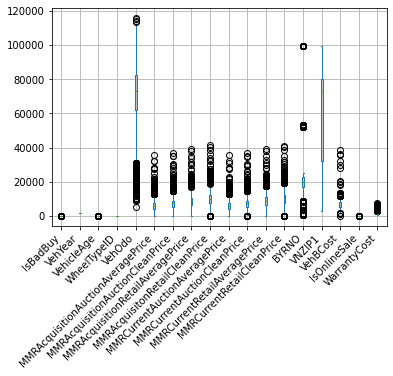

In [24]:
trainData[trainData.columns].plot(kind='box',widths=0.1, grid = True)
plt.xticks(rotation=45, ha='right')

In [25]:
#Checking for correlation
trainData.corr(method ='pearson')

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,-0.158831,0.166345,-0.045503,0.082339,-0.110846,-0.104518,-0.089655,-0.085906,-0.111043,-0.105893,-0.105842,-0.102224,-0.062218,0.005092,-0.105178,-0.003991,0.053290
VehYear,-0.158831,1.000000,-0.957884,0.258164,-0.284761,0.583201,0.534999,0.583686,0.541739,0.592622,0.550248,0.600088,0.560370,0.280807,0.067263,0.352389,0.057696,-0.269218
VehicleAge,0.166345,-0.957884,1.000000,-0.249643,0.321200,-0.567443,-0.520552,-0.462922,-0.428395,-0.577150,-0.534019,-0.505247,-0.470616,-0.268002,-0.073848,-0.314148,-0.025345,0.260806
WheelTypeID,-0.045503,0.258164,-0.249643,1.000000,-0.213733,-0.096494,-0.130663,-0.073683,-0.103030,-0.089333,-0.121956,-0.075686,-0.103569,0.187190,0.005904,-0.162480,-0.008463,-0.132769
VehOdo,0.082339,-0.284761,0.321200,-0.213733,1.000000,-0.017089,0.024335,0.031122,0.062733,-0.028015,0.012478,0.016564,0.048444,-0.289358,-0.053318,-0.059555,0.030262,0.412299
MMRAcquisitionAuctionAveragePrice,-0.110846,0.583201,-0.567443,-0.096494,-0.017089,1.000000,0.990356,0.910186,0.909916,0.937882,0.932402,0.871838,0.870958,0.109162,0.044803,0.789630,0.039992,-0.050998
MMRAcquisitionAuctionCleanPrice,-0.104518,0.534999,-0.520552,-0.130663,0.024335,0.990356,1.000000,0.902518,0.917943,0.923702,0.932022,0.860877,0.871171,0.063950,0.039722,0.781325,0.039983,-0.021391
MMRAcquisitionRetailAveragePrice,-0.089655,0.583686,-0.462922,-0.073683,0.031122,0.910186,0.902518,1.000000,0.990206,0.851547,0.849155,0.913338,0.906121,0.109706,0.034400,0.745655,0.081747,-0.052709
MMRAcquisitonRetailCleanPrice,-0.085906,0.541739,-0.428395,-0.103030,0.062733,0.909916,0.917943,0.990206,1.000000,0.846796,0.855397,0.903473,0.906920,0.072092,0.030099,0.744536,0.078794,-0.026361
MMRCurrentAuctionAveragePrice,-0.111043,0.592622,-0.577150,-0.089333,-0.028015,0.937882,0.923702,0.851547,0.846796,1.000000,0.990314,0.914929,0.912059,0.112329,0.047077,0.778773,0.040935,-0.057614


In [26]:
#Checking for correlation
trainData.corr(method ='kendall')

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,-0.134292,0.140761,-0.047460,0.066680,-0.102561,-0.098804,-0.080979,-0.078653,-0.101739,-0.098822,-0.094099,-0.091826,-0.022874,0.001642,-0.092512,-0.003991,0.036665
VehYear,-0.134292,1.000000,-0.903497,0.240394,-0.198900,0.473058,0.433565,0.464401,0.429356,0.476946,0.441450,0.474337,0.440071,0.111258,0.018871,0.271171,0.051673,-0.178289
VehicleAge,0.140761,-0.903497,1.000000,-0.233327,0.228520,-0.458801,-0.420850,-0.357524,-0.331062,-0.465058,-0.429312,-0.392094,-0.364242,-0.098815,-0.023510,-0.240356,-0.022094,0.168778
WheelTypeID,-0.047460,0.240394,-0.233327,1.000000,-0.171027,-0.064922,-0.092285,-0.048797,-0.073571,-0.058513,-0.084227,-0.050939,-0.074106,0.082866,-0.003044,-0.137028,-0.009106,-0.138715
VehOdo,0.066680,-0.198900,0.228520,-0.171027,1.000000,-0.020722,0.005169,0.017933,0.039221,-0.028206,-0.003344,0.007237,0.028291,-0.110870,-0.026221,-0.037678,0.023447,0.317037
MMRAcquisitionAuctionAveragePrice,-0.102561,0.473058,-0.458801,-0.064922,-0.020722,1.000000,0.920646,0.740198,0.723409,0.831293,0.817695,0.699559,0.696428,0.052110,0.014588,0.631636,0.033477,0.003235
MMRAcquisitionAuctionCleanPrice,-0.098804,0.433565,-0.420850,-0.092285,0.005169,0.920646,1.000000,0.717291,0.747485,0.804483,0.823537,0.686338,0.700094,0.035080,0.013258,0.636593,0.033838,0.027731
MMRAcquisitionRetailAveragePrice,-0.080979,0.464401,-0.357524,-0.048797,0.017933,0.740198,0.717291,1.000000,0.917161,0.668020,0.664895,0.788633,0.771992,0.057457,0.010185,0.577333,0.068933,-0.006724
MMRAcquisitonRetailCleanPrice,-0.078653,0.429356,-0.331062,-0.073571,0.039221,0.723409,0.747485,0.917161,1.000000,0.662691,0.674960,0.769974,0.779902,0.041582,0.008755,0.584665,0.067210,0.015367
MMRCurrentAuctionAveragePrice,-0.101739,0.476946,-0.465058,-0.058513,-0.028206,0.831293,0.804483,0.668020,0.662691,1.000000,0.920710,0.749528,0.731860,0.051206,0.016639,0.610260,0.033819,-0.000640



It's showing that there are heavy correlation between all the MMR columns


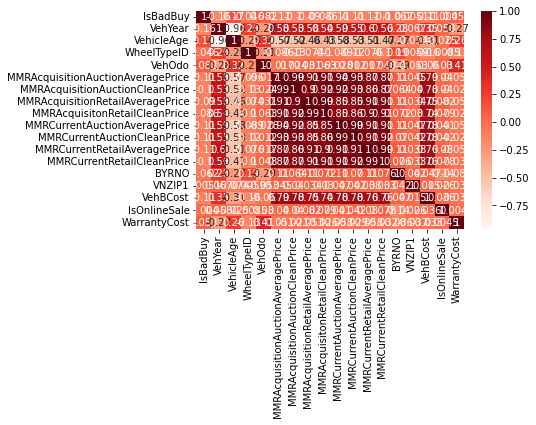

In [27]:
#heatmap to see the correlation between all the columns

corr=trainData.corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)

print()

print("It's showing that there are heavy correlation between all the MMR columns")


The target column in the training samples are highly imbalanced since there are more 0's than 1's


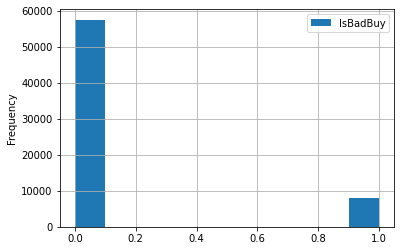

In [28]:
trainData[['IsBadBuy']].plot(kind='hist',grid = True)
print()
print("The target column in the training samples are highly imbalanced since there are more 0's than 1's")

#Training/test split

In [29]:
y = trainData[['IsBadBuy']]
y

,IsBadBuy
0,0
1,0
2,1
3,0
4,0
...,...
65615,0
65616,0
65617,0
65618,0


In [30]:
X = trainData.drop(columns = ['IsBadBuy'], axis = 1) 
X

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,2009-11-11,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,MANUAL,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,2009-01-07,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,AUTO,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,2010-11-02,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,AUTO,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,2009-03-04,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,AUTO,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,2009-07-23,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,AUTO,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,2009-02-24,MANHEIM,2006,3,KIA,OPTIMA V6 2.7L V6 MP,LX,4D SEDAN LX,RED,AUTO,...,7572.0,8763.0,NaN,NaN,18111,30331,GA,5830.0,0,728
65616,2010-05-13,MANHEIM,2005,5,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,GREEN,AUTO,...,8950.0,9952.0,NaN,NaN,18881,30272,GA,5195.0,0,1389
65617,2010-12-15,OTHER,2007,3,FORD,FOCUS,ZX4,4D SEDAN S,GOLD,AUTO,...,8888.0,10299.0,NaN,NaN,22808,73108,OK,5180.0,0,1243
65618,2009-09-29,ADESA,2006,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,RED,AUTO,...,10401.0,12057.0,NaN,NaN,99740,50111,IA,7295.0,0,1272


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.1)

#Data preparation

**Transforming data types**

In [32]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

We see there are in total 20 columns with null values....of which only 10 columns ('WheelTypeID','MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice' & 'VehBCost') have numerical data and others are categorical data.

We need to encode such non-numerical data and rebuild our dataset

In [33]:
lab = LabelEncoder()

#perform label encoding on 'team' column
trainData['Trim'] = lab.fit_transform(trainData['Trim'])
trainData['PurchDate'] = lab.fit_transform(trainData['PurchDate'])
trainData['Auction'] = lab.fit_transform(trainData['Auction'])
trainData['Make'] = lab.fit_transform(trainData['Make'])
trainData['Model'] = lab.fit_transform(trainData['Model'])
trainData['VNST'] = lab.fit_transform(trainData['VNST'])
trainData['SubModel'] = lab.fit_transform(trainData['SubModel'])
trainData['Color'] = lab.fit_transform(trainData['Color'])
trainData['Transmission'] = lab.fit_transform(trainData['Transmission'])
trainData['WheelType'] = lab.fit_transform(trainData['WheelType'])
trainData['Nationality'] = lab.fit_transform(trainData['Nationality'])
trainData['Size'] = lab.fit_transform(trainData['Size'])
trainData['TopThreeAmericanName'] = lab.fit_transform(trainData['TopThreeAmericanName'])
trainData['PRIMEUNIT'] = lab.fit_transform(trainData['PRIMEUNIT'])
trainData['AUCGUART'] = lab.fit_transform(trainData['AUCGUART'])

pd.set_option('display.max_columns', None)
trainData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,223,2,2007,2,12,834,134,191,1,1,1.0,0,35547,2,5,3,6079.0,7322.0,7065.0,8408.0,5669.0,6807.0,9568.0,10428.0,2,2,5546,35004,0,6400.0,0,462
1,0,2,0,2005,4,25,375,23,480,13,0,2.0,1,72131,2,5,3,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,2,2,20207,77086,29,3870.0,0,569
2,1,474,2,2006,4,2,190,56,33,12,0,1.0,0,77113,0,0,2,5293.0,6668.0,8685.0,10348.0,5084.0,6014.0,8235.0,9230.0,2,2,1235,84104,30,5310.0,1,803
3,0,42,1,2004,5,2,952,55,706,13,0,2.0,1,76202,0,11,2,3127.0,3764.0,3877.0,4565.0,3542.0,4468.0,4325.0,5325.0,2,2,20928,32824,5,4600.0,0,4622
4,0,143,1,2007,2,3,905,7,681,12,0,1.0,0,72653,0,11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,835,85353,2,6215.0,0,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,36,1,2006,3,12,656,60,243,12,0,1.0,0,68584,2,5,3,6113.0,7122.0,7102.0,8192.0,6548.0,7651.0,7572.0,8763.0,2,2,18111,30331,6,5830.0,0,728
65616,0,352,1,2005,5,4,854,98,286,5,0,1.0,0,77945,0,5,0,4932.0,6328.0,8291.0,9873.0,6009.0,7288.0,8950.0,9952.0,2,2,18881,30272,6,5195.0,0,1389
65617,0,505,2,2007,3,5,358,127,257,4,0,1.0,0,84341,0,0,1,5310.0,6626.0,9095.0,10140.0,5664.0,7148.0,8888.0,10299.0,2,2,22808,73108,24,5180.0,0,1243
65618,0,191,0,2006,3,21,405,7,148,12,0,1.0,0,78991,0,5,2,7091.0,8581.0,8158.0,9767.0,7148.0,8389.0,10401.0,12057.0,2,2,99740,50111,7,7295.0,0,1272


#Data imputation

We need to impute the missing datas in the numerical data columns

In [34]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           65620 non-null  int64  
 1   PurchDate                          65620 non-null  int64  
 2   Auction                            65620 non-null  int64  
 3   VehYear                            65620 non-null  int64  
 4   VehicleAge                         65620 non-null  int64  
 5   Make                               65620 non-null  int64  
 6   Model                              65620 non-null  int64  
 7   Trim                               65620 non-null  int64  
 8   SubModel                           65620 non-null  int64  
 9   Color                              65620 non-null  int64  
 10  Transmission                       65620 non-null  int64  
 11  WheelTypeID                        62747 non-null  flo

In [35]:
#All categorical value columns
"""WheelTypeID','MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice' & 'VehBCost' """

"WheelTypeID','MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice' & 'VehBCost' "

In [36]:
trainData.isnull().sum()

IsBadBuy                                0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                    0
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                          2873
WheelType                               0
VehOdo                                  0
Nationality                             0
Size                                    0
TopThreeAmericanName                    0
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         290
MMRCurrentAuctionCleanPrice           290
MMRCurrentRetailAveragePrice      

In [37]:
trainData.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBadBuy,65620.0,0.123499,0.329012,0.0,0.00,0.0,0.00,1.0
PurchDate,65620.0,264.237306,149.652282,0.0,140.00,271.0,395.00,516.0
Auction,65620.0,1.040186,0.660270,0.0,1.00,1.0,1.00,2.0
VehYear,65620.0,2005.345215,1.730096,2001.0,2004.00,2005.0,2007.00,2010.0
VehicleAge,65620.0,4.175130,1.709897,0.0,3.00,4.0,5.00,9.0
Make,65620.0,7.448857,7.142509,0.0,3.00,4.0,11.00,28.0
Model,65620.0,500.326074,275.707998,0.0,300.00,471.0,740.00,1028.0
Trim,65620.0,59.545078,38.298507,0.0,23.00,56.0,85.00,134.0
SubModel,65620.0,303.461125,193.198906,0.0,148.00,236.0,393.00,840.0
Color,65620.0,7.966062,5.141248,0.0,2.00,7.0,13.00,16.0


In [38]:
#Filling missing datas with mean values of each column
trainData['WheelTypeID'] = trainData['WheelTypeID'].fillna(trainData.describe()['WheelTypeID']['75%']) #values are ranging from 0-3 and 75% of the datas are 2 
trainData['MMRAcquisitionAuctionAveragePrice'] = trainData['MMRAcquisitionAuctionAveragePrice'].fillna(trainData['MMRAcquisitionAuctionAveragePrice'].mean()) #75% of the values are 7.7k+ so taking the mean value which is a little over 6k seemed logical
trainData['MMRAcquisitionAuctionCleanPrice'] = trainData['MMRAcquisitionAuctionCleanPrice'].fillna(trainData['MMRAcquisitionAuctionCleanPrice'].mean()) #75% of the values are 9k+ so taking the mean value which is a little over 7k seemed logical and it is applicable for all MMR values

trainData['MMRAcquisitionRetailAveragePrice'] = trainData['MMRAcquisitionRetailAveragePrice'].fillna(trainData['MMRAcquisitionRetailAveragePrice'].mean()) 
trainData['MMRAcquisitonRetailCleanPrice'] = trainData['MMRAcquisitonRetailCleanPrice'].fillna(trainData['MMRAcquisitonRetailCleanPrice'].mean()) 

trainData['MMRCurrentAuctionAveragePrice'] = trainData['MMRCurrentAuctionAveragePrice'].fillna(trainData['MMRCurrentAuctionAveragePrice'].mean())
trainData['MMRCurrentAuctionCleanPrice'] = trainData['MMRCurrentAuctionCleanPrice'].fillna(trainData['MMRCurrentAuctionCleanPrice'].mean()) 

trainData['MMRCurrentRetailAveragePrice'] = trainData['MMRCurrentRetailAveragePrice'].fillna(trainData['MMRCurrentRetailAveragePrice'].mean())
trainData['MMRCurrentRetailCleanPrice'] = trainData['MMRCurrentRetailCleanPrice'].fillna(trainData['MMRCurrentRetailCleanPrice'].mean()) 
trainData['VehBCost'] = trainData['VehBCost'].fillna(trainData['VehBCost'].mean()) #Same as MMR values is applicable in this case also

trainData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,223,2,2007,2,12,834,134,191,1,1,1.0,0,35547,2,5,3,6079.0,7322.0,7065.0,8408.0,5669.0,6807.0,9568.0,10428.0,2,2,5546,35004,0,6400.0,0,462
1,0,2,0,2005,4,25,375,23,480,13,0,2.0,1,72131,2,5,3,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,2,2,20207,77086,29,3870.0,0,569
2,1,474,2,2006,4,2,190,56,33,12,0,1.0,0,77113,0,0,2,5293.0,6668.0,8685.0,10348.0,5084.0,6014.0,8235.0,9230.0,2,2,1235,84104,30,5310.0,1,803
3,0,42,1,2004,5,2,952,55,706,13,0,2.0,1,76202,0,11,2,3127.0,3764.0,3877.0,4565.0,3542.0,4468.0,4325.0,5325.0,2,2,20928,32824,5,4600.0,0,4622
4,0,143,1,2007,2,3,905,7,681,12,0,1.0,0,72653,0,11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,835,85353,2,6215.0,0,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,36,1,2006,3,12,656,60,243,12,0,1.0,0,68584,2,5,3,6113.0,7122.0,7102.0,8192.0,6548.0,7651.0,7572.0,8763.0,2,2,18111,30331,6,5830.0,0,728
65616,0,352,1,2005,5,4,854,98,286,5,0,1.0,0,77945,0,5,0,4932.0,6328.0,8291.0,9873.0,6009.0,7288.0,8950.0,9952.0,2,2,18881,30272,6,5195.0,0,1389
65617,0,505,2,2007,3,5,358,127,257,4,0,1.0,0,84341,0,0,1,5310.0,6626.0,9095.0,10140.0,5664.0,7148.0,8888.0,10299.0,2,2,22808,73108,24,5180.0,0,1243
65618,0,191,0,2006,3,21,405,7,148,12,0,1.0,0,78991,0,5,2,7091.0,8581.0,8158.0,9767.0,7148.0,8389.0,10401.0,12057.0,2,2,99740,50111,7,7295.0,0,1272


#Dealing with outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(1, 0, 'IsBadBuy'),
  Text(2, 0, 'PurchDate'),
  Text(3, 0, 'Auction'),
  Text(4, 0, 'VehYear'),
  Text(5, 0, 'VehicleAge'),
  Text(6, 0, 'Make'),
  Text(7, 0, 'Model'),
  Text(8, 0, 'Trim'),
  Text(9, 0, 'SubModel'),
  Text(10, 0, 'Color'),
  Text(11, 0, 'Transmission'),
  Text(12, 0, 'WheelTypeID'),
  Text(13, 0, 'WheelType'),
  Text(14, 0, 'VehOdo'),
  Text(15, 0, 'Nationality'),
  Text(16, 0, 'Size'),
  Text(17, 0, 'TopThreeAmericanName'),
  Text(18, 0, 'MMRAcquisitionAuctionAveragePrice'),
  Text(19, 0, 'MMRAcquisitionAuctionCleanPrice'),
  Text(20, 0, 'MMRAcquisitionRetailAveragePrice'),
  Text(21, 0, 'MMRAcquisitonRetailCleanPrice'),
  Text(22, 0, 'MMRCurrentAuctionAveragePrice'),
  Text(23, 0, 'MMRCurrentAuctionCleanPrice'),
  Text(24, 0, 'MMRCurrentRetailAveragePrice'),
  Text(25, 0, 'MMRCurrentRetailCleanPrice'),
  Text(26

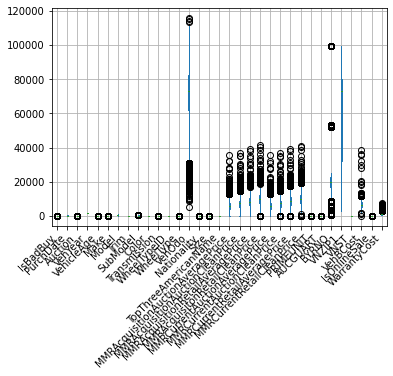

In [39]:
trainData[trainData.columns].plot(kind='box',widths=0.1, grid = True)
plt.xticks(rotation=45, ha='right')

The boxplot is telling us there exists outliers in some of the columns of the dataframe...We will filter out all the datas that are less than 10% and more than 90%

Calculating total number of outliers

In [40]:
# Calculating total number of outliers
Q1 = trainData.quantile(0.25)
Q3 = trainData.quantile(0.75)
IQR = Q3 - Q1

In [41]:
protTrainData = trainData.select_dtypes(include=['int64', 'float64'],exclude =['object',np.datetime64])
out = ((protTrainData < (Q1 - 1.5 * IQR)) | (protTrainData > (Q3 + 1.5 * IQR))).sum()
out

IsBadBuy                              8104
PurchDate                                0
Auction                              28713
VehYear                                  0
VehicleAge                             567
Make                                  2392
Model                                    0
Trim                                     0
SubModel                              1462
Color                                    0
Transmission                          2332
WheelTypeID                              0
WheelType                             2877
VehOdo                                 305
Nationality                          10709
Size                                  5242
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      468
MMRAcquisitionAuctionCleanPrice        743
MMRAcquisitionRetailAveragePrice       275
MMRAcquisitonRetailCleanPrice         1118
MMRCurrentAuctionAveragePrice          521
MMRCurrentAuctionCleanPrice           1206
MMRCurrentR

In [42]:
out.sum()

98024

In [43]:
#Observation: More outliers than the total rows (more than 50%)

Reason behind choosing Z score to remove outliers is as follows

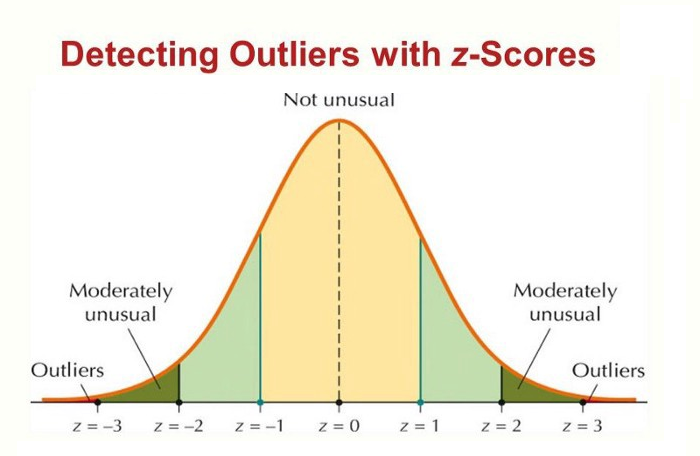

In [44]:
#Eradicating rows with outliers using "Z Score" but excluding the CATEGORICAL VALUES and DATETIME

def clean_data(data):
  cleanedOutliersData = data[(np.abs(stats.zscore(data.select_dtypes(include=['int64', 'float64'],exclude =['object',np.datetime64]))) < 3).all(axis=1)]
  return cleanedOutliersData



trainData = clean_data(trainData)
trainData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
1,0,2,0,2005,4,25,375,23,480,13,0,2.0,1,72131,2,5,3,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,2,2,20207,77086,29,3870.0,0,569
6,0,78,0,2005,4,18,409,17,186,13,0,2.0,1,86550,2,5,3,4714.0,5997.0,5591.0,6977.0,4714.0,5997.0,5591.0,6977.0,2,2,17675,28273,17,6360.0,0,594
7,0,159,2,2006,3,4,177,7,148,1,0,2.0,1,78618,0,9,0,9314.0,11109.0,10559.0,12498.0,9131.0,10782.0,10361.0,12145.0,2,2,20740,29461,27,8600.0,0,1389
10,0,164,1,2006,3,3,905,60,681,13,0,2.0,1,54283,0,11,0,6788.0,8971.0,7831.0,10189.0,6441.0,8376.0,7456.0,9546.0,2,2,18822,78219,29,6625.0,0,1251
11,0,187,1,2006,3,2,548,55,226,1,0,2.0,1,69925,0,5,2,5862.0,6939.0,6831.0,7994.0,6137.0,7405.0,7128.0,8497.0,2,2,16926,94544,3,6900.0,0,1118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,0,335,1,2004,6,2,167,7,148,4,0,2.0,1,77586,0,0,2,2994.0,3904.0,5883.0,6559.0,2659.0,3482.0,5562.0,6312.0,2,2,20740,19440,26,4245.0,0,1155
65615,0,36,1,2006,3,12,656,60,243,12,0,1.0,0,68584,2,5,3,6113.0,7122.0,7102.0,8192.0,6548.0,7651.0,7572.0,8763.0,2,2,18111,30331,6,5830.0,0,728
65616,0,352,1,2005,5,4,854,98,286,5,0,1.0,0,77945,0,5,0,4932.0,6328.0,8291.0,9873.0,6009.0,7288.0,8950.0,9952.0,2,2,18881,30272,6,5195.0,0,1389
65617,0,505,2,2007,3,5,358,127,257,4,0,1.0,0,84341,0,0,1,5310.0,6626.0,9095.0,10140.0,5664.0,7148.0,8888.0,10299.0,2,2,22808,73108,24,5180.0,0,1243


In [45]:
# Eradicating rows with outliers using "Z Score" but excluding the CATEGORICAL VALUES and DATETIME

# trainData = trainData[(np.abs(stats.zscore(trainData.select_dtypes(include=['int64', 'float64'],exclude =['object',np.datetime64]))) < 3).all(axis=1)]
# trainData

Dropping redundant features



```
Didn't get this hint "'WheelTypeID' with 'WheelType' and 'VehAge' with VehYear'.

but my observation is, if WheelTypeID = (2,1) then WheelType = (1,0)
and also PurchDate-VehYear=VehicleAge
```




In [46]:
#Dropping "VehYear" & "WheelTypeID" columns

trainData = trainData.drop(["VehYear", "WheelTypeID"], axis = 1)
trainData

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
1,0,2,0,4,25,375,23,480,13,0,1,72131,2,5,3,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,2,2,20207,77086,29,3870.0,0,569
6,0,78,0,4,18,409,17,186,13,0,1,86550,2,5,3,4714.0,5997.0,5591.0,6977.0,4714.0,5997.0,5591.0,6977.0,2,2,17675,28273,17,6360.0,0,594
7,0,159,2,3,4,177,7,148,1,0,1,78618,0,9,0,9314.0,11109.0,10559.0,12498.0,9131.0,10782.0,10361.0,12145.0,2,2,20740,29461,27,8600.0,0,1389
10,0,164,1,3,3,905,60,681,13,0,1,54283,0,11,0,6788.0,8971.0,7831.0,10189.0,6441.0,8376.0,7456.0,9546.0,2,2,18822,78219,29,6625.0,0,1251
11,0,187,1,3,2,548,55,226,1,0,1,69925,0,5,2,5862.0,6939.0,6831.0,7994.0,6137.0,7405.0,7128.0,8497.0,2,2,16926,94544,3,6900.0,0,1118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,0,335,1,6,2,167,7,148,4,0,1,77586,0,0,2,2994.0,3904.0,5883.0,6559.0,2659.0,3482.0,5562.0,6312.0,2,2,20740,19440,26,4245.0,0,1155
65615,0,36,1,3,12,656,60,243,12,0,0,68584,2,5,3,6113.0,7122.0,7102.0,8192.0,6548.0,7651.0,7572.0,8763.0,2,2,18111,30331,6,5830.0,0,728
65616,0,352,1,5,4,854,98,286,5,0,0,77945,0,5,0,4932.0,6328.0,8291.0,9873.0,6009.0,7288.0,8950.0,9952.0,2,2,18881,30272,6,5195.0,0,1389
65617,0,505,2,3,5,358,127,257,4,0,0,84341,0,0,1,5310.0,6626.0,9095.0,10140.0,5664.0,7148.0,8888.0,10299.0,2,2,22808,73108,24,5180.0,0,1243


#Resampling


The target column in the training samples are highly imbalanced since there are more 0's than 1's
Counter({0: 46824, 1: 5121})


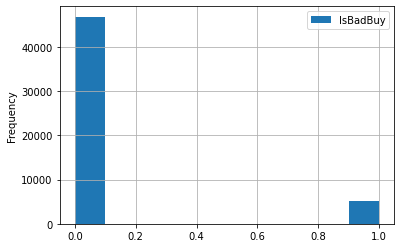

In [47]:
trainData[['IsBadBuy']].plot(kind='hist',grid = True)
print()
print("The target column in the training samples are highly imbalanced since there are more 0's than 1's")
print(counter(trainData['IsBadBuy']))

In [48]:
trainData.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehicleAge', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

**Using SmoteTomek to resample and balance this unbalanced dataset**

https://youtu.be/IIj6J0TW-nw


In [49]:
from collections import Counter
from imblearn.combine import SMOTETomek

x = trainData.drop(["IsBadBuy"],axis = 1) #Predictor variable
y = trainData["IsBadBuy"] #Target variable

print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})

smt = SMOTETomek(random_state=42)

X_res, y_res = smt.fit_resample(x, y)

print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({0: 46824, 1: 5121})
Resampled dataset shape Counter({0: 46459, 1: 46459})


#Modeling

In [50]:
trainData.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehicleAge', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [51]:
datetime = ["PurchDate"]

col_num = ["IsBadBuy","VehYear", "VehicleAge", "WheelTypeID", "VehOdo", 
           "MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", 
           "MMRAcquisitionRetailAveragePrice","MMRAcquisitonRetailCleanPrice",
           "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", 
           "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice", "BYRNO"
           "VNZIP1", "VehBCost", "IsOnlineSale", "WarrantyCost"]
        
col_cat = ["Auction", "Make", "Model", "Tirm", "Submodel", 
           "Color", "Transmission", "WheelType", "Nationality", "Size", 
           "TopThreeAmericanName", "PRIMEUNIT", "AUCGUART", "VNST"]

Deploying the `random forest` algorithm.
Selected this algorithm due to having so many columns and features in the dataset. Both categorical and numerical....Although encoded all the categorical features but yet, selected this ensemble algorithm due to it's nature of predicting the final outcome by voting unitwise!

In [52]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test= train_test_split(X_res, y_res, test_size= 0.25, random_state=0) 

In [53]:
rf_Model = RandomForestClassifier(oob_score=True, bootstrap= True, criterion="entropy", n_estimators=1000, random_state = 10 )
rf_Model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True,
                       random_state=10)

In [54]:
y_pred= rf_Model.predict(x_test)  

In [55]:
from sklearn.metrics import classification_report 
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11626
           1       0.97      0.91      0.94     11604

    accuracy                           0.94     23230
   macro avg       0.94      0.94      0.94     23230
weighted avg       0.94      0.94      0.94     23230



**Evaluating on test set**

Before evaluating on test set, need to format the test set first!

In [56]:
testData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2010-03-31,MANHEIM,2007,3,CHRYSLER,SEBRING 4C,Bas,4D SEDAN,BLACK,AUTO,1.0,Alloy,60690,AMERICAN,MEDIUM,CHRYSLER,8529,9811,11610,12840,7520.0,8624.0,11337.0,12402.0,NaN,NaN,22808,75236,TX,8040.0,0,1020
1,0,2009-01-13,MANHEIM,2003,6,FORD,TAURUS 3.0L V6 EFI S,SE,4D WAGON LX,BROWN,AUTO,1.0,Alloy,77872,AMERICAN,MEDIUM,FORD,1902,2803,2554,3527,2157.0,3422.0,2830.0,4196.0,NaN,NaN,3453,80022,CO,3640.0,0,1220
2,0,2009-12-23,ADESA,2008,1,DODGE,CALIBER,SE,4D WAGON,RED,AUTO,2.0,Covers,49454,AMERICAN,MEDIUM,CHRYSLER,6892,7440,10934,11524,7524.0,8277.0,10564.0,11431.0,NaN,NaN,20234,85226,AZ,6765.0,0,693
3,0,2010-08-03,MANHEIM,2005,5,HYUNDAI,ACCENT,GLS,2D HATCHBACK,BLACK,AUTO,2.0,Covers,48794,OTHER ASIAN,COMPACT,OTHER,2773,3792,6005,7236,3643.0,4248.0,6611.0,7185.0,NaN,NaN,835,85040,AZ,5340.0,0,693
4,0,2009-03-04,MANHEIM,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L LS,BEIGE,AUTO,1.0,Alloy,87430,AMERICAN,MEDIUM SUV,GM,7530,8827,8632,10033,7618.0,9055.0,8727.0,10279.0,NaN,NaN,20207,75236,TX,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,1,2010-05-27,MANHEIM,2003,7,CHEVROLET,1500HD SILVERADO PIC,LS,CREW CAB 6.0L LS,WHITE,AUTO,1.0,Alloy,92263,AMERICAN,LARGE TRUCK,GM,7946,9923,12452,14744,6887.0,10054.0,10907.0,14684.0,NaN,NaN,25100,77061,TX,10810.0,0,1641
6558,0,2010-01-15,MANHEIM,2005,5,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,SILVER,AUTO,1.0,Alloy,88985,AMERICAN,MEDIUM,CHRYSLER,3478,4758,6842,7955,4035.0,5557.0,7146.0,8702.0,NaN,NaN,22916,89165,NV,3685.0,0,1503
6559,0,2009-12-09,ADESA,2005,4,PONTIAC,G6 V6,Bas,4D SEDAN,GREY,AUTO,1.0,Alloy,54552,AMERICAN,MEDIUM,GM,5256,6371,8501,10034,6213.0,7264.0,9760.0,11105.0,NaN,NaN,21053,85226,AZ,6565.0,0,1003
6560,1,2010-11-15,OTHER,2008,2,JEEP,COMPASS FWD 4C,Spo,4D SUV SPORT 2.0L,BLACK,AUTO,1.0,Alloy,64595,AMERICAN,SMALL SUV,CHRYSLER,7585,8439,11584,12801,8641.0,9569.0,12124.0,13160.0,NaN,NaN,99761,90045,CA,8100.0,0,825


In [57]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           6562 non-null   int64         
 1   PurchDate                          6562 non-null   datetime64[ns]
 2   Auction                            6562 non-null   object        
 3   VehYear                            6562 non-null   int64         
 4   VehicleAge                         6562 non-null   int64         
 5   Make                               6562 non-null   object        
 6   Model                              6562 non-null   object        
 7   Trim                               6341 non-null   object        
 8   SubModel                           6561 non-null   object        
 9   Color                              6561 non-null   object        
 10  Transmission                       6

In [58]:
print(f'is NaN {testData.isna().sum()}')

is NaN IsBadBuy                                0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  221
SubModel                                1
Color                                   1
Transmission                            1
WheelTypeID                           267
WheelType                             267
VehOdo                                  0
Nationality                             1
Size                                    1
TopThreeAmericanName                    1
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice          23
MMRCurrentAuctionCleanPrice            23
MMRCurrentRetailAveragePric

In [59]:
#check for size
print(f'index_size: {testData.index.size}')
#check for duplicates
print(f'duplicate entries: {testData.duplicated().sum()}')

index_size: 6562
duplicate entries: 0


In [60]:
#Transforming data types

lab = LabelEncoder()

#perform label encoding on 'team' column
testData['Trim'] = lab.fit_transform(testData['Trim'])
testData['PurchDate'] = lab.fit_transform(testData['PurchDate'])
testData['Auction'] = lab.fit_transform(testData['Auction'])
testData['Make'] = lab.fit_transform(testData['Make'])
testData['Model'] = lab.fit_transform(testData['Model'])
testData['VNST'] = lab.fit_transform(testData['VNST'])
testData['SubModel'] = lab.fit_transform(testData['SubModel'])
testData['Color'] = lab.fit_transform(testData['Color'])
testData['Transmission'] = lab.fit_transform(testData['Transmission'])
testData['WheelType'] = lab.fit_transform(testData['WheelType'])
testData['Nationality'] = lab.fit_transform(testData['Nationality'])
testData['Size'] = lab.fit_transform(testData['Size'])
testData['TopThreeAmericanName'] = lab.fit_transform(testData['TopThreeAmericanName'])
testData['PRIMEUNIT'] = lab.fit_transform(testData['PRIMEUNIT'])
testData['AUCGUART'] = lab.fit_transform(testData['AUCGUART'])

pd.set_option('display.max_columns', None)
testData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,309,1,2007,3,3,449,6,82,1,0,1.0,0,60690,0,5,0,8529,9811,11610,12840,7520.0,8624.0,11337.0,12402.0,2,2,22808,75236,29,8040.0,0,1020
1,0,4,1,2003,6,5,509,63,298,3,0,1.0,0,77872,0,5,1,1902,2803,2554,3527,2157.0,3422.0,2830.0,4196.0,2,2,3453,80022,4,3640.0,0,1220
2,0,243,0,2008,1,4,61,63,289,12,0,2.0,1,49454,0,5,0,6892,7440,10934,11524,7524.0,8277.0,10564.0,11431.0,2,2,20234,85226,2,6765.0,0,693
3,0,396,1,2005,5,8,15,26,35,1,0,2.0,1,48794,2,0,3,2773,3792,6005,7236,3643.0,4248.0,6611.0,7185.0,2,2,835,85040,2,5340.0,0,693
4,0,40,1,2005,4,2,532,39,234,0,0,1.0,0,87430,0,6,2,7530,8827,8632,10033,7618.0,9055.0,8727.0,10279.0,2,2,20207,75236,29,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,1,350,1,2003,7,2,5,39,337,14,0,1.0,0,92263,0,4,2,7946,9923,12452,14744,6887.0,10054.0,10907.0,14684.0,2,2,25100,77061,29,10810.0,0,1641
6558,0,256,1,2005,5,4,488,77,173,13,0,1.0,0,88985,0,5,0,3478,4758,6842,7955,4035.0,5557.0,7146.0,8702.0,2,2,22916,89165,22,3685.0,0,1503
6559,0,233,0,2005,4,21,219,6,82,6,0,1.0,0,54552,0,5,2,5256,6371,8501,10034,6213.0,7264.0,9760.0,11105.0,2,2,21053,85226,2,6565.0,0,1003
6560,1,470,2,2008,2,11,102,78,276,1,0,1.0,0,64595,0,7,0,7585,8439,11584,12801,8641.0,9569.0,12124.0,13160.0,2,2,99761,90045,3,8100.0,0,825


In [61]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           6562 non-null   int64  
 1   PurchDate                          6562 non-null   int64  
 2   Auction                            6562 non-null   int64  
 3   VehYear                            6562 non-null   int64  
 4   VehicleAge                         6562 non-null   int64  
 5   Make                               6562 non-null   int64  
 6   Model                              6562 non-null   int64  
 7   Trim                               6562 non-null   int64  
 8   SubModel                           6562 non-null   int64  
 9   Color                              6562 non-null   int64  
 10  Transmission                       6562 non-null   int64  
 11  WheelTypeID                        6295 non-null   float

In [62]:
testData.isnull().sum()

IsBadBuy                               0
PurchDate                              0
Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                   0
SubModel                               0
Color                                  0
Transmission                           0
WheelTypeID                          267
WheelType                              0
VehOdo                                 0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
MMRAcquisitionAuctionAveragePrice      0
MMRAcquisitionAuctionCleanPrice        0
MMRAcquisitionRetailAveragePrice       0
MMRAcquisitonRetailCleanPrice          0
MMRCurrentAuctionAveragePrice         23
MMRCurrentAuctionCleanPrice           23
MMRCurrentRetailAveragePrice          23
MMRCurrentRetail

In [63]:
#Filling missing datas with mean values of each column
testData['WheelTypeID'] = testData['WheelTypeID'].fillna(testData.describe()['WheelTypeID']['75%']) #values are ranging from 0-3 and 75% of the datas are 2 
testData['MMRAcquisitionAuctionAveragePrice'] = testData['MMRAcquisitionAuctionAveragePrice'].fillna(testData['MMRAcquisitionAuctionAveragePrice'].mean()) #75% of the values are 7.7k+ so taking the mean value which is a little over 6k seemed logical
testData['MMRAcquisitionAuctionCleanPrice'] = testData['MMRAcquisitionAuctionCleanPrice'].fillna(testData['MMRAcquisitionAuctionCleanPrice'].mean()) #75% of the values are 9k+ so taking the mean value which is a little over 7k seemed logical and it is applicable for all MMR values

testData['MMRAcquisitionRetailAveragePrice'] = testData['MMRAcquisitionRetailAveragePrice'].fillna(testData['MMRAcquisitionRetailAveragePrice'].mean()) 
testData['MMRAcquisitonRetailCleanPrice'] = testData['MMRAcquisitonRetailCleanPrice'].fillna(testData['MMRAcquisitonRetailCleanPrice'].mean()) 

testData['MMRCurrentAuctionAveragePrice'] = testData['MMRCurrentAuctionAveragePrice'].fillna(testData['MMRCurrentAuctionAveragePrice'].mean())
testData['MMRCurrentAuctionCleanPrice'] = testData['MMRCurrentAuctionCleanPrice'].fillna(testData['MMRCurrentAuctionCleanPrice'].mean()) 

testData['MMRCurrentRetailAveragePrice'] = testData['MMRCurrentRetailAveragePrice'].fillna(testData['MMRCurrentRetailAveragePrice'].mean())
testData['MMRCurrentRetailCleanPrice'] = testData['MMRCurrentRetailCleanPrice'].fillna(testData['MMRCurrentRetailCleanPrice'].mean()) 
testData['VehBCost'] = testData['VehBCost'].fillna(testData['VehBCost'].mean()) #Same as MMR values is applicable in this case also

testData

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,309,1,2007,3,3,449,6,82,1,0,1.0,0,60690,0,5,0,8529,9811,11610,12840,7520.0,8624.0,11337.0,12402.0,2,2,22808,75236,29,8040.0,0,1020
1,0,4,1,2003,6,5,509,63,298,3,0,1.0,0,77872,0,5,1,1902,2803,2554,3527,2157.0,3422.0,2830.0,4196.0,2,2,3453,80022,4,3640.0,0,1220
2,0,243,0,2008,1,4,61,63,289,12,0,2.0,1,49454,0,5,0,6892,7440,10934,11524,7524.0,8277.0,10564.0,11431.0,2,2,20234,85226,2,6765.0,0,693
3,0,396,1,2005,5,8,15,26,35,1,0,2.0,1,48794,2,0,3,2773,3792,6005,7236,3643.0,4248.0,6611.0,7185.0,2,2,835,85040,2,5340.0,0,693
4,0,40,1,2005,4,2,532,39,234,0,0,1.0,0,87430,0,6,2,7530,8827,8632,10033,7618.0,9055.0,8727.0,10279.0,2,2,20207,75236,29,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,1,350,1,2003,7,2,5,39,337,14,0,1.0,0,92263,0,4,2,7946,9923,12452,14744,6887.0,10054.0,10907.0,14684.0,2,2,25100,77061,29,10810.0,0,1641
6558,0,256,1,2005,5,4,488,77,173,13,0,1.0,0,88985,0,5,0,3478,4758,6842,7955,4035.0,5557.0,7146.0,8702.0,2,2,22916,89165,22,3685.0,0,1503
6559,0,233,0,2005,4,21,219,6,82,6,0,1.0,0,54552,0,5,2,5256,6371,8501,10034,6213.0,7264.0,9760.0,11105.0,2,2,21053,85226,2,6565.0,0,1003
6560,1,470,2,2008,2,11,102,78,276,1,0,1.0,0,64595,0,7,0,7585,8439,11584,12801,8641.0,9569.0,12124.0,13160.0,2,2,99761,90045,3,8100.0,0,825


In [64]:
testData = testData.drop(["VehYear", "WheelTypeID"], axis = 1)
testData

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,309,1,3,3,449,6,82,1,0,0,60690,0,5,0,8529,9811,11610,12840,7520.0,8624.0,11337.0,12402.0,2,2,22808,75236,29,8040.0,0,1020
1,0,4,1,6,5,509,63,298,3,0,0,77872,0,5,1,1902,2803,2554,3527,2157.0,3422.0,2830.0,4196.0,2,2,3453,80022,4,3640.0,0,1220
2,0,243,0,1,4,61,63,289,12,0,1,49454,0,5,0,6892,7440,10934,11524,7524.0,8277.0,10564.0,11431.0,2,2,20234,85226,2,6765.0,0,693
3,0,396,1,5,8,15,26,35,1,0,1,48794,2,0,3,2773,3792,6005,7236,3643.0,4248.0,6611.0,7185.0,2,2,835,85040,2,5340.0,0,693
4,0,40,1,4,2,532,39,234,0,0,0,87430,0,6,2,7530,8827,8632,10033,7618.0,9055.0,8727.0,10279.0,2,2,20207,75236,29,6725.0,0,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,1,350,1,7,2,5,39,337,14,0,0,92263,0,4,2,7946,9923,12452,14744,6887.0,10054.0,10907.0,14684.0,2,2,25100,77061,29,10810.0,0,1641
6558,0,256,1,5,4,488,77,173,13,0,0,88985,0,5,0,3478,4758,6842,7955,4035.0,5557.0,7146.0,8702.0,2,2,22916,89165,22,3685.0,0,1503
6559,0,233,0,4,21,219,6,82,6,0,0,54552,0,5,2,5256,6371,8501,10034,6213.0,7264.0,9760.0,11105.0,2,2,21053,85226,2,6565.0,0,1003
6560,1,470,2,2,11,102,78,276,1,0,0,64595,0,7,0,7585,8439,11584,12801,8641.0,9569.0,12124.0,13160.0,2,2,99761,90045,3,8100.0,0,825


Finally, Evaluating the feature aim test set against the train set's prediction

In [65]:
x_val = testData.drop(["IsBadBuy"],axis = 1) #Predictor variable
y_val = testData["IsBadBuy"] #Target variable

In [66]:
from sklearn.ensemble import RandomForestClassifier

x_train_val, x_test_val, y_train_val, y_test_val= train_test_split(x_val, y_val, test_size= 0.25, random_state=0) 

In [67]:
y_pred_val= rf_Model.predict(x_test_val) 

In [68]:
from sklearn.metrics import classification_report 
cr_val= classification_report(y_test_val, y_pred_val)
print(cr_val)

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1429
           1       0.15      0.45      0.22       212

    accuracy                           0.59      1641
   macro avg       0.51      0.53      0.47      1641
weighted avg       0.79      0.59      0.66      1641



`The accuracy is only 59% without any kind of hyperparameter tuning or any kind of feature engineering.`

#**Feature engineering**

*`I already did encoding of the categorical values so I do not think I need to do it here again`*

#**Dimensionality reduction**

During EDA, Using both Pearson and Kendall methods, I found few features to be strongly correlated `(The MMR columns)` so I will use Principal component analysis (PCA) for dimensional reduction.

A heatmap is provided below for visual references

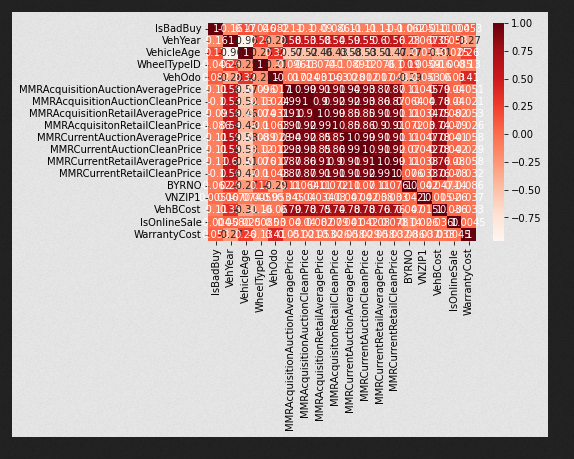

In [69]:
from sklearn.decomposition import PCA

def dim_reduction(df):
  print(df)
  '''
  Input: Dataframe
  Process: Performs PCA on correlated columns.
  Output: Data imputed dataframe
  '''
  pca_corr_cols = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
  'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
  'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
  'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
  pca = PCA(n_components=0.8)
  arr_pca = pca.fit_transform(df.iloc[:, 15:23])
  df = df.drop(pca_corr_cols, axis=1)
  df['pca_Price'] = arr_pca
  return(df)

#**Feature selection**

To avoid overfitting, I did some feature selections. The ones that are actually more important than the others.

In [70]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [71]:
testData.isna().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
BYRNO                    

In [72]:
train_copy = trainData.copy()
train_dim = dim_reduction(train_copy)
print('Completed data preparation for features_train....')

       IsBadBuy  PurchDate  Auction  VehicleAge  Make  Model  Trim  SubModel  \
1             0          2        0           4    25    375    23       480   
6             0         78        0           4    18    409    17       186   
7             0        159        2           3     4    177     7       148   
10            0        164        1           3     3    905    60       681   
11            0        187        1           3     2    548    55       226   
...         ...        ...      ...         ...   ...    ...   ...       ...   
65614         0        335        1           6     2    167     7       148   
65615         0         36        1           3    12    656    60       243   
65616         0        352        1           5     4    854    98       286   
65617         0        505        2           3     5    358   127       257   
65618         0        191        0           3    21    405     7       148   

       Color  Transmission  WheelType  

In [73]:
print(train_dim)

       IsBadBuy  PurchDate  Auction  VehicleAge  Make  Model  Trim  SubModel  \
1             0          2        0           4    25    375    23       480   
6             0         78        0           4    18    409    17       186   
7             0        159        2           3     4    177     7       148   
10            0        164        1           3     3    905    60       681   
11            0        187        1           3     2    548    55       226   
...         ...        ...      ...         ...   ...    ...   ...       ...   
65614         0        335        1           6     2    167     7       148   
65615         0         36        1           3    12    656    60       243   
65616         0        352        1           5     4    854    98       286   
65617         0        505        2           3     5    358   127       257   
65618         0        191        0           3    21    405     7       148   

       Color  Transmission  WheelType  

In [74]:
train_dim.isna().sum()

IsBadBuy                0
PurchDate               0
Auction                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
SubModel                0
Color                   0
Transmission            0
WheelType               0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
BYRNO                   0
VNZIP1                  0
VNST                    0
VehBCost                0
IsOnlineSale            0
WarrantyCost            0
pca_Price               0
dtype: int64

In [75]:
train_dim

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,pca_Price
1,0,2,0,4,25,375,23,480,13,0,1,72131,2,5,3,2,2,20207,77086,29,3870.0,0,569,-8619.442332
6,0,78,0,4,18,409,17,186,13,0,1,86550,2,5,3,2,2,17675,28273,17,6360.0,0,594,-6422.566157
7,0,159,2,3,4,177,7,148,1,0,1,78618,0,9,0,2,2,20740,29461,27,8600.0,0,1389,7459.473568
10,0,164,1,3,3,905,60,681,13,0,1,54283,0,11,0,2,2,18822,78219,29,6625.0,0,1251,334.840250
11,0,187,1,3,2,548,55,226,1,0,1,69925,0,5,2,2,2,16926,94544,3,6900.0,0,1118,-2832.941153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,0,335,1,6,2,167,7,148,4,0,1,77586,0,0,2,2,2,20740,19440,26,4245.0,0,1155,-9328.123927
65615,0,36,1,3,12,656,60,243,12,0,0,68584,2,5,3,2,2,18111,30331,6,5830.0,0,728,-2042.447310
65616,0,352,1,5,4,854,98,286,5,0,0,77945,0,5,0,2,2,18881,30272,6,5195.0,0,1389,-761.016576
65617,0,505,2,3,5,358,127,257,4,0,0,84341,0,0,1,2,2,22808,73108,24,5180.0,0,1243,-157.136413


In [76]:
test_copy = testData.copy()
test_dim = dim_reduction(test_copy)
print('Completed data preparation for features_test....')

      IsBadBuy  PurchDate  Auction  VehicleAge  Make  Model  Trim  SubModel  \
0            0        309        1           3     3    449     6        82   
1            0          4        1           6     5    509    63       298   
2            0        243        0           1     4     61    63       289   
3            0        396        1           5     8     15    26        35   
4            0         40        1           4     2    532    39       234   
...        ...        ...      ...         ...   ...    ...   ...       ...   
6557         1        350        1           7     2      5    39       337   
6558         0        256        1           5     4    488    77       173   
6559         0        233        0           4    21    219     6        82   
6560         1        470        2           2    11    102    78       276   
6561         0        278        0           4    12    477    18        82   

      Color  Transmission  WheelType  VehOdo  Natio

In [77]:
print(test_dim)

      IsBadBuy  PurchDate  Auction  VehicleAge  Make  Model  Trim  SubModel  \
0            0        309        1           3     3    449     6        82   
1            0          4        1           6     5    509    63       298   
2            0        243        0           1     4     61    63       289   
3            0        396        1           5     8     15    26        35   
4            0         40        1           4     2    532    39       234   
...        ...        ...      ...         ...   ...    ...   ...       ...   
6557         1        350        1           7     2      5    39       337   
6558         0        256        1           5     4    488    77       173   
6559         0        233        0           4    21    219     6        82   
6560         1        470        2           2    11    102    78       276   
6561         0        278        0           4    12    477    18        82   

      Color  Transmission  WheelType  VehOdo  Natio

In [78]:
test_dim.isna().sum()

IsBadBuy                0
PurchDate               0
Auction                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
SubModel                0
Color                   0
Transmission            0
WheelType               0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
BYRNO                   0
VNZIP1                  0
VNST                    0
VehBCost                0
IsOnlineSale            0
WarrantyCost            0
pca_Price               0
dtype: int64

#**Model training**

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report

In [80]:
model_log = LogisticRegression(C = 5.0, penalty='l2', solver = 'liblinear', random_state=45)
model_rfc = RandomForestClassifier(oob_score=True, bootstrap= True, criterion="entropy", n_estimators=1000, random_state = 10 )
model_svc = LinearSVC()

In [81]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred1 = model.predict(X_test1)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test1, y_pred1))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test1, y_pred1)

    print('Accuracy:', np.round(accuracy_score(y_test1, y_pred1), 2))
    print('F1 score:', np.round(f1_score(y_test1, y_pred1,average='weighted'),2))
    print('Recall:', np.round(recall_score(y_test1, y_pred1,average='weighted'),2))
    print('Precision:', np.round(precision_score(y_test1, y_pred1,average='weighted'),2), '\n')

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = [value for value in cf_matrix.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [82]:
train_dim

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,pca_Price
1,0,2,0,4,25,375,23,480,13,0,1,72131,2,5,3,2,2,20207,77086,29,3870.0,0,569,-8619.442332
6,0,78,0,4,18,409,17,186,13,0,1,86550,2,5,3,2,2,17675,28273,17,6360.0,0,594,-6422.566157
7,0,159,2,3,4,177,7,148,1,0,1,78618,0,9,0,2,2,20740,29461,27,8600.0,0,1389,7459.473568
10,0,164,1,3,3,905,60,681,13,0,1,54283,0,11,0,2,2,18822,78219,29,6625.0,0,1251,334.840250
11,0,187,1,3,2,548,55,226,1,0,1,69925,0,5,2,2,2,16926,94544,3,6900.0,0,1118,-2832.941153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,0,335,1,6,2,167,7,148,4,0,1,77586,0,0,2,2,2,20740,19440,26,4245.0,0,1155,-9328.123927
65615,0,36,1,3,12,656,60,243,12,0,0,68584,2,5,3,2,2,18111,30331,6,5830.0,0,728,-2042.447310
65616,0,352,1,5,4,854,98,286,5,0,0,77945,0,5,0,2,2,18881,30272,6,5195.0,0,1389,-761.016576
65617,0,505,2,3,5,358,127,257,4,0,0,84341,0,0,1,2,2,22808,73108,24,5180.0,0,1243,-157.136413


In [83]:
X_tr = train_dim.drop(columns = ['IsBadBuy'], axis = 1)
y_tr = train_dim[['IsBadBuy']] 
# X_tr
# y_tr

In [84]:
X_te = test_dim.drop(columns = ['IsBadBuy'], axis = 1)
y_te = test_dim[['IsBadBuy']] 
# X_te
# y_te

In [85]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred1 = model.predict(X_te)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_te, y_pred1))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_te, y_pred1)

    print('Accuracy:', np.round(accuracy_score(y_te, y_pred1), 2))
    print('F1 score:', np.round(f1_score(y_te, y_pred1,average='weighted'),2))
    print('Recall:', np.round(recall_score(y_te, y_pred1,average='weighted'),2))
    print('Precision:', np.round(precision_score(y_te, y_pred1,average='weighted'),2), '\n')

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = [value for value in cf_matrix.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5716
           1       0.00      0.00      0.00       846

    accuracy                           0.87      6562
   macro avg       0.44      0.50      0.47      6562
weighted avg       0.76      0.87      0.81      6562

Accuracy: 0.87
F1 score: 0.81
Recall: 0.87
Precision: 0.76 



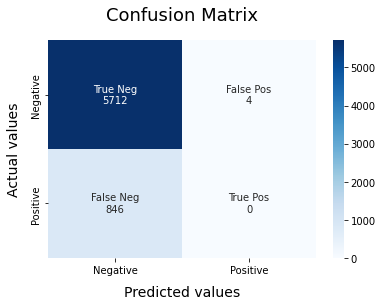

In [86]:
rf_Model = RandomForestClassifier(oob_score=True, bootstrap= True, criterion="entropy", n_estimators=1000, random_state = 10 )
rf_Model.fit(X_tr, y_tr)

model_Evaluate(rf_Model)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5716
           1       0.00      0.00      0.00       846

    accuracy                           0.87      6562
   macro avg       0.44      0.50      0.47      6562
weighted avg       0.76      0.87      0.81      6562

Accuracy: 0.87
F1 score: 0.81
Recall: 0.87
Precision: 0.76 



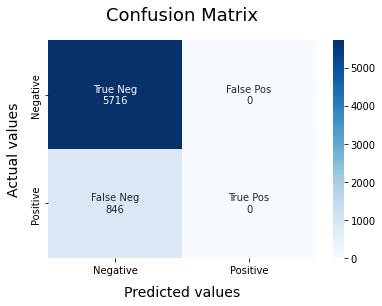

In [92]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_tr, y_tr)

model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5716
           1       0.00      0.00      0.00       846

    accuracy                           0.87      6562
   macro avg       0.44      0.50      0.47      6562
weighted avg       0.76      0.87      0.81      6562

Accuracy: 0.87
F1 score: 0.81
Recall: 0.87
Precision: 0.76 



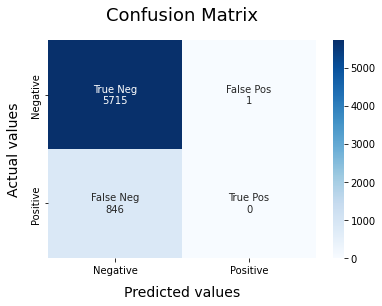

In [93]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_tr, y_tr)

model_Evaluate(LRmodel)